In [63]:
# Read in the micro-array data - so far only founds matches between 1230 genes in whitfield in the 56K genes from GTEX
# TODO - get better name mapping
import math
import pandas as pd
import numpy as np
count = 0
count_found = 0
whitfield_micro_array_df = pd.read_csv("Whitfield_2013_cell_cycle_2830_all_scores.csv")


def get_coarse_phase(angle):
    predicted_phase = -1
    if angle >= 0 and angle <= 2:
        predicted_phase = "S"
    elif angle > 2 and angle <= 4.8:
        predicted_phase = "G2M"
    elif angle > 4.8 and angle <= 5.9:
        predicted_phase = "G1"
    elif angle > 5.9:
        predicted_phase = "S"
    return predicted_phase

gene_names_with_micro_array_data = list()

time_course_1_angles_list = list()
time_course_2_angles_list = list()
time_course_3_angles_list = list()
time_course_4_angles_list = list()
time_course_all_phases_list = list()
time_course_all_angles_list = list()
names_for_all_time_courses_list = list()
gene_name_to_time_course_expressions_dict = dict()

# calculate the angles for the 4 time courses
for i in range(0,40,2): #t-course 1 T = 17.65, φ = 0.0
    #print(math.atan2(math.sin((i/17.65)*2*math.pi),math.cos((i/17.65)*2*math.pi))) # with negative radians
    angle = ((i/17.65)*2*math.pi)%(2*math.pi)
    time_course_1_angles_list.append(angle) # 0 to 2pi
    time_course_all_angles_list.append(angle) # 0 to 2pi
    time_course_all_phases_list.append(get_coarse_phase(angle)) # 0 to 2pi
    names_for_all_time_courses_list.append("t1_" + str(i))
for i in range(0,48,2): #t-course 2 T = 18.6, φ = 0.0
    #print(math.atan2(math.sin((i/18.6)*2*math.pi),math.cos((i/18.6)*2*math.pi))) # with negative radians
    angle = ((i/18.6)*2*math.pi)%(2*math.pi)
    time_course_2_angles_list.append(angle) # 0 to 2pi
    time_course_all_angles_list.append(angle) # 0 to 2pi
    time_course_all_phases_list.append(get_coarse_phase(angle))
    names_for_all_time_courses_list.append("t2_" + str(i))
for i in range(0,48,2): #t-course 3 T = 18, φ = 0.0
    #print(math.atan2(math.sin((i/18)*2*math.pi),math.cos((i/18)*2*math.pi))) # with negative radians
    angle = ((i/18)*2*math.pi)%(2*math.pi)
    time_course_3_angles_list.append(angle) # 0 to 2pi
    time_course_all_angles_list.append(angle) # 0 to 2pi
    time_course_all_phases_list.append(get_coarse_phase(angle))
    names_for_all_time_courses_list.append("t3_" + str(i))
for i in range(0,46,2): #t-course 4 T = 23.95, φ = 2.3
    #print(math.atan2(math.sin((i/23.95)*2*math.pi + 2.3),math.cos((i/23.95)*2*math.pi + 2.3))) # with negative radians
    angle = ((i/23.95)*2*math.pi + 2.3)%(2*math.pi)
    time_course_4_angles_list.append(angle) # 0 to 2pi
    time_course_all_angles_list.append(angle) # 0 to 2pi
    time_course_all_phases_list.append(get_coarse_phase(angle))
    names_for_all_time_courses_list.append("t4_" + str(i))
    
for index, row in whitfield_micro_array_df.iterrows():
    count +=1
    name = str(row['NAME'])
    if (name != 'nan'):
        #print("___" + name + "___")
        names = name.split("^")
        if (len(names) > 1):
            #print("___" + names[1] + "___")
            gene_name = names[1].strip()
            if (not(gene_name in gene_names_with_micro_array_data)):
                
                
                ####!!!! cut-off to have just a few top cycling genes
                scaled_fourier_score = float(row['Scaled Fourier'])
                #if (scaled_fourier_score < 10.0):
                 #   continue
                    
                
                #print(gene_name + " is found")
                gene_names_with_micro_array_data.append(gene_name)
                count_found += 1
                gene_name_to_time_course_expressions_dict[gene_name] = dict()
                
                
                
                new_row = row[11:31].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[11:31] = new_row
            
                new_row = row[32:56].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[32:56] = new_row
                
                new_row = row[57:81].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[57:81] = new_row
                
                new_row = row[82:105].replace(r'\s+', np.nan, regex=True)
                new_row = new_row.fillna(0)
                row[82:105] = new_row
                
                
                #TODO: for now adding zero to missing time courses and samples - valid for all things?
                
                gene_name_to_time_course_expressions_dict[gene_name]["all"] = list()
                gene_name_to_time_course_expressions_dict[gene_name]["one"] = list()
                for i in range(11,31):
                    gene_name_to_time_course_expressions_dict[gene_name]["one"].append(row[i])
                    gene_name_to_time_course_expressions_dict[gene_name]["all"].append(row[i])
                gene_name_to_time_course_expressions_dict[gene_name]["two"] = list()
                for i in range(32,56):
                    gene_name_to_time_course_expressions_dict[gene_name]["two"].append(row[i])
                    gene_name_to_time_course_expressions_dict[gene_name]["all"].append(row[i])
                gene_name_to_time_course_expressions_dict[gene_name]["three"] = list()
                for i in range(57,81):
                    gene_name_to_time_course_expressions_dict[gene_name]["three"].append(row[i])
                    gene_name_to_time_course_expressions_dict[gene_name]["all"].append(row[i])
                gene_name_to_time_course_expressions_dict[gene_name]["four"] = list()
                for i in range(82,105):
                    gene_name_to_time_course_expressions_dict[gene_name]["four"].append(row[i])
                    gene_name_to_time_course_expressions_dict[gene_name]["all"].append(row[i])
    
                gene_name_to_time_course_expressions_dict[gene_name]["sine"] = row['Sin']
                gene_name_to_time_course_expressions_dict[gene_name]["cosine"] = row['Cos']
                gene_name_to_time_course_expressions_dict[gene_name]["phase"] = row['Phase'].strip()
                gene_name_to_time_course_expressions_dict[gene_name]["fourier_score"] = scaled_fourier_score
print(count_found)

1827


In [83]:
checked_pairs = dict()
num_kept_pairs = 0
for gene1 in gene_names_with_micro_array_data:
    for gene2 in gene_names_with_micro_array_data:
        if (gene1 != gene2 and (gene1, gene2) not in checked_pairs and (gene2, gene1) not in checked_pairs):
            # break up time course points based on coarse phases
            
            #print(gene1)
            #print(gene2)
            # select pairs of genes where:
            # in each coarse phase,  one is up, the other is down, or vice-versa, more or less consistently
            S_higher = 0
            S_lower = 0
            G2M_higher = 0
            G2M_lower = 0
            G1_higher = 0
            G1_lower = 0
            avg_diff_sum = 0
            for exp1, exp2, phase in zip(gene_name_to_time_course_expressions_dict[gene1]["all"], gene_name_to_time_course_expressions_dict[gene2]["all"], time_course_all_phases_list):
                #print(exp1)
                #print(exp2)
                #print(phase)
                if (exp1 > exp2):
                    if (phase == "S"):
                        S_higher +=1
                    elif (phase == "G1"):
                        G1_higher +=1
                    elif (phase == "G2M"):
                        G2M_higher += 1
                elif (exp1 < exp2):
                    if (phase == "S"):
                        S_lower +=1
                    elif (phase == "G1"):
                        G1_lower +=1
                    elif (phase == "G2M"):
                        G2M_lower += 1
                avg_diff_sum += abs(max(exp1,exp2) - min(exp1,exp2))
            #print("S: " + str(S_higher) + " " + str(S_lower))
            #print("G1: " + str(G1_higher) + " " + str(G1_lower))
            #print("G2M: " + str(G2M_higher) + " " + str(G2M_lower))
            avg_diff = avg_diff_sum / len(time_course_all_phases_list)
            S_passed = False
            G2M_passed = False
            G1_passed = False
            if (max(S_higher, S_lower)/(S_higher + S_lower) >= 0.75):
                S_passed = True
            if (max(G1_higher, G1_lower)/(G1_higher + G1_lower) >= 0.75):
                G1_passed = True
            if (max(G2M_higher, G2M_lower)/(G2M_higher + G2M_lower) >= 0.75):
                G2M_passed = True
            #if ((S_passed and G1_passed) or (S_passed and G2M_passed) or (G1_passed and G2M_passed)):
            if (S_passed and G1_passed and G2M_passed): # and (avg_diff >= 0.4) and (gene_name_to_time_course_expressions_dict[gene1]["fourier_score"] > 5.0) and (gene_name_to_time_course_expressions_dict[gene2]["fourier_score"] > 5.0)):
                # order by 1. the magnitude of the differences and 2, the scaled fourier score
                num_kept_pairs += 1
                #for exp1, exp2, phase in zip(gene_name_to_time_course_expressions_dict[gene1]["all"], gene_name_to_time_course_expressions_dict[gene2]["all"], time_course_all_phases_list):
                 #   print(exp1)
                #  print(exp2)
                #    print(phase)
                #print(gene1)
                #print(gene2)
                #print(gene_name_to_time_course_expressions_dict[gene1]["fourier_score"])
                #print(gene_name_to_time_course_expressions_dict[gene2]["fourier_score"])
                #print(avg_diff)
                checked_pairs[(gene1, gene2)] = list()
            #if (len(checked_pairs) > 10):                
             #   break
    #if (len(checked_pairs) > 10):              
     #   break
print(num_kept_pairs)

2120


In [66]:
print(len(checked_pairs))

1668051


In [67]:
SC_df = pd.read_csv("Stahlberg_MCF7_group_1_to_6.csv", sep=',')
def phase_to_string(phase_number):
    if (phase_number in (1, 4, 9)):
        return "G1"
    if (phase_number in (2, 5, 10)):
        return "S"
    if (phase_number in (3, 6, 11)):
        return "G2M"
SC_df = SC_df.rename(lambda x: x + "_" + phase_to_string(int(SC_df.loc[x, "#Group"])))
SC_df = SC_df.iloc[:,:-3]
SC_df = SC_df.replace(-1,0.0).T

In [42]:
# download human gene lengths
import gzip

human_gene_name_to_length_kb = dict()

with gzip.open('gencode.v21.annotation.gtf.gz','rt') as fin:        
    for line in fin:        
        la = line.split("\t")
        if (len(la) >= 8 and la[2] == "gene"):
            gene_length = int(la[4]) - int(la[3])
            if (gene_length < 0):
                print("Problem, negative gene length!\n")
                break
            aa = la[8].split(";")
            for a in aa:
                if ("gene_name" in a):
                    gene_name = a.strip().split(" ")[1].strip('\"')
                    human_gene_name_to_length_kb[gene_name] = gene_length;
                    break

In [68]:
# get "internal" cell gene tpm 
internal_cell_gene_tpms = dict()
internal_gene_avg_tpms = dict()
G1_gene_ranges = dict()
S_gene_ranges = dict()
G2M_gene_ranges = dict()


for cell_name in SC_df:
    RPK_sum = 0
    internal_cell_gene_tpms[cell_name] = dict()
    for gene_name, row in SC_df.iterrows():
        if (gene_name in human_gene_name_to_length_kb and SC_df[cell_name][gene_name]):
            RPK_sum += SC_df[cell_name][gene_name]/(human_gene_name_to_length_kb[gene_name])
    #print(RPK_sum)
    #per_million_scale = RPK_sum/1000000
    for gene_name, row in SC_df.iterrows():
        if (gene_name in human_gene_name_to_length_kb and SC_df[cell_name][gene_name]):
            RPK = SC_df[cell_name][gene_name]/(human_gene_name_to_length_kb[gene_name])
            TPM_cell = (RPK/RPK_sum)*1000000
            #print(gene_name + " " + cell_name)
            #print(RPK)
            #print(TPM_cell)
            #print(gene_name_to_tpm_dict[gene_name])
            # save the list of all the TPMs for a given gene to calculate an internal reference
            if (gene_name not in internal_gene_avg_tpms):
                internal_gene_avg_tpms[gene_name] = list()
            internal_gene_avg_tpms[gene_name].append(TPM_cell)
            internal_cell_gene_tpms[cell_name][gene_name] = TPM_cell
            # for visualization and testing
            if ("_G1" in cell_name):
                if (gene_name not in G1_gene_ranges):
                    G1_gene_ranges[gene_name] = list()
                G1_gene_ranges[gene_name].append(TPM_cell)
            if ("_S" in cell_name):
                if (gene_name not in S_gene_ranges):
                    S_gene_ranges[gene_name] = list()
                S_gene_ranges[gene_name].append(TPM_cell)
            if ("_G2M" in cell_name):
                if (gene_name not in G2M_gene_ranges):
                    G2M_gene_ranges[gene_name] = list()
                G2M_gene_ranges[gene_name].append(TPM_cell)
        
    #break

In [69]:
# use"internal" cell gene tpm to get log norm ratio for each cell and gene - a measure of surprise
import math
internal_TPM_per_gene = dict() # as median of all cells

for gene_name in internal_gene_avg_tpms:
    avg_tpm = sum(internal_gene_avg_tpms[gene_name])/len(internal_gene_avg_tpms[gene_name])
    internal_TPM_per_gene[gene_name] = avg_tpm
    #print(gene_name)
    #print(internal_TPM_per_gene[gene_name])

SC_log_norm_df = SC_df.copy()
for cell_name in SC_df:
    for gene_name, row in SC_df.iterrows():
        if (gene_name in human_gene_name_to_length_kb and SC_df[cell_name][gene_name]):
            SC_log_norm_df[cell_name][gene_name] = math.log(internal_cell_gene_tpms[cell_name][gene_name]/internal_TPM_per_gene[gene_name], 2)
        else:
            SC_log_norm_df[cell_name][gene_name] = 0

In [80]:
%%time
# OK, try to find direct matches between depletion; now use pairs of values
SC_our_assignment_tupples_list = list()
total_count = 0
for cell_name in SC_df:
    
    # get a set of genes that are non-zero in that cell, and properly get a percentage
    whitfield_subset_micro_array_df = pd.DataFrame(columns = range(0,91))
    cell_cycle_genes_for_analysis = list()
    gene_count = 0
    for gene_name, row in SC_log_norm_df.iterrows():
        if gene_name in gene_names_with_micro_array_data and SC_log_norm_df[cell_name][gene_name]:
            gene_count += 1
            cell_cycle_genes_for_analysis.append(gene_name)
            whitfield_subset_micro_array_df.loc[gene_name] = gene_name_to_time_course_expressions_dict[gene_name]["all"]
    print(str(gene_count) + " genes used for cell " + cell_name)
    #break
    
    #print(whitfield_subset_micro_array_df)
    
    all_genes_angle_list = list()
    all_genes_sine_sum = 0
    all_genes_cosine_sum = 0
    count = 0
    genes_greater_than_max = 0
    genes_less_than_min = 0
    for gene1_name in cell_cycle_genes_for_analysis:
        for gene2_name in cell_cycle_genes_for_analysis:
            if ((gene1_name, gene2_name) in checked_pairs or (gene1_name, gene2_name) in checked_pairs):  
                count += 1
                delta_expression_scRNA = SC_log_norm_df[cell_name][gene1_name] - SC_log_norm_df[cell_name][gene2_name] # take the difference of log normalized data
                #print(gene1_name)
                #print(gene2_name)
                #print(delta_expression_scRNA)
        
                best_diff = math.inf
                best_angle = -1
                
                
                for i in range(0, 91):
                    delta_microarray = whitfield_subset_micro_array_df.loc[gene1_name][i] - whitfield_subset_micro_array_df.loc[gene2_name][i]
                    diff = abs(delta_microarray - delta_expression_scRNA)
                    if (diff < best_diff and (whitfield_subset_micro_array_df.loc[gene1_name][i] != 0) and (whitfield_subset_micro_array_df.loc[gene2_name][i] != 0)):
                        best_diff = diff
                        best_angle = time_course_all_angles_list[i]
        
                all_genes_sine_sum += math.sin(best_angle)
                all_genes_cosine_sum += math.cos(best_angle)
                all_genes_angle_list.append(best_angle)
        #print(whitfield_subset_micro_array_df.loc[gene_name][0:91])
        #print(expression_scRNA)
    print(str(count) + " gene pairs used for this cell")  
    total_count += count
    #print(str(genes_greater_than_max) + " genes have expression > max of timecourse")
    #print(str(genes_less_than_min) + " genes have expression < min of timecourse") 
    #import matplotlib.pyplot as plt
    #plt.hist(all_genes_angle_list, bins=100)
    #plt.xlabel('Angles of Genes voting for Single Cell ' + cell_name)
    #plt.ylabel('Frequency')
    #plt.title('Angle Distribution')
    #plt.show()
    average_angle_across_all_genes = math.atan2(all_genes_sine_sum, all_genes_cosine_sum)
    #print(average_angle_across_all_genes)
    if (average_angle_across_all_genes < 0):
        average_angle_across_all_genes += 2*math.pi
    #print(average_angle_across_all_genes)
    predicted_phase = get_coarse_phase(average_angle_across_all_genes)
    print(predicted_phase)
    SC_our_assignment_tupples_list.append((cell_name, predicted_phase))
print("Average number of pairs used per cell is " + str(total_count/len(SC_df.columns)))

10 genes used for cell A1_G1
45 gene pairs used for this cell
G2M
12 genes used for cell A2_G1
66 gene pairs used for this cell
S
16 genes used for cell A3_S
120 gene pairs used for this cell
S
23 genes used for cell A4_S
253 gene pairs used for this cell
S
22 genes used for cell A5_G2M
231 gene pairs used for this cell
S
18 genes used for cell A6_G2M
153 gene pairs used for this cell
G2M
19 genes used for cell A7_G1
171 gene pairs used for this cell
S
18 genes used for cell A8_G1
153 gene pairs used for this cell
S
19 genes used for cell A9_S
171 gene pairs used for this cell
S
17 genes used for cell A10_S
136 gene pairs used for this cell
G2M
19 genes used for cell A11_G2M
171 gene pairs used for this cell
G2M
19 genes used for cell A12_G2M
171 gene pairs used for this cell
G2M
14 genes used for cell A2b_G1
91 gene pairs used for this cell
S
18 genes used for cell B2_G1
153 gene pairs used for this cell
G2M
19 genes used for cell A4b_S
171 gene pairs used for this cell
S
23 genes use

In [81]:
S_tp = 0
S_fp = 0
S_fn = 0
G2M_tp = 0
G2M_fp = 0
G2M_fn = 0
G1_tp = 0
G1_fp = 0
G1_fn = 0    
 
for (cell_name, predicted_phase) in SC_our_assignment_tupples_list:
    if ("_S" in cell_name):
        if (predicted_phase == "S"):
            S_tp += 1
        else:
            S_fn += 1
            if (predicted_phase == "G2M"):
                G2M_fp += 1
            elif (predicted_phase == "G1"):
                G1_fp += 1
    elif ("_G2" in cell_name):        
        if (predicted_phase == "G2M"):
            G2M_tp += 1        
        else:
            G2M_fn += 1
            if (predicted_phase == "S"):
                S_fp += 1
            elif (predicted_phase == "G1"):
                G1_fp += 1
    elif ("_G1" in cell_name):
        if (predicted_phase == "G1"):
            G1_tp += 1
        else:
            G1_fn += 1
            if (predicted_phase == "S"):
                S_fp += 1
            elif (predicted_phase == "G2M"):
                G2M_fp += 1 

S_precision = S_tp / (S_tp + S_fp) if S_tp else 0
S_recall = S_tp / (S_tp + S_fn) if S_tp else 0
G2M_precision = G2M_tp / (G2M_tp + G2M_fp) if G2M_tp else 0
G2M_recall = G2M_tp / (G2M_tp + G2M_fn) if G2M_tp else 0
G1_precision = G1_tp / (G1_tp + G1_fp) if G1_tp else 0
G1_recall = G1_tp / (G1_tp + G1_fn) if G1_tp else 0
precision_avg = (S_precision + G2M_precision + G1_precision)/3
recall_avg = (S_recall + G2M_recall + G1_recall)/3
f1_score = 2*((precision_avg*recall_avg)/(precision_avg+recall_avg))
print("F1_score")
print(f1_score)

F1_score
0.49504756153449697


In [51]:
print(len(SC_df.columns))

90


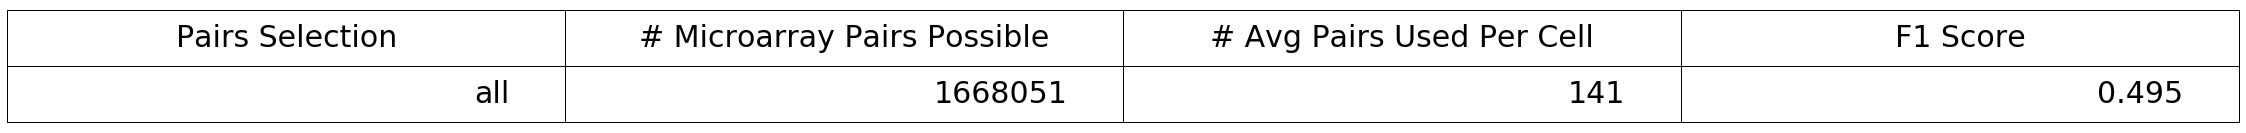

In [82]:
import matplotlib.pyplot as plt
from pylab import *
stahlberg_test_data = []
stahlberg_test_data.append(["all", "1668051", "141", "0.495"])

plt.figure(1, figsize=(20, 2))
plt.subplots_adjust(bottom = 0.1)
column_labels = ["Pairs Selection", "# Microarray Pairs Possible", "# Avg Pairs Used Per Cell", "F1 Score"]
ax = subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
the_table = ax.table(cellText=stahlberg_test_data, colLabels=column_labels, loc="center")
the_table.auto_set_font_size(False)
the_table.set_fontsize(30)
the_table.scale(2, 2)
table_props = the_table.properties()
table_cells = table_props['child_artists']
for cell in table_cells: cell.set_height(0.5)
plt.show()

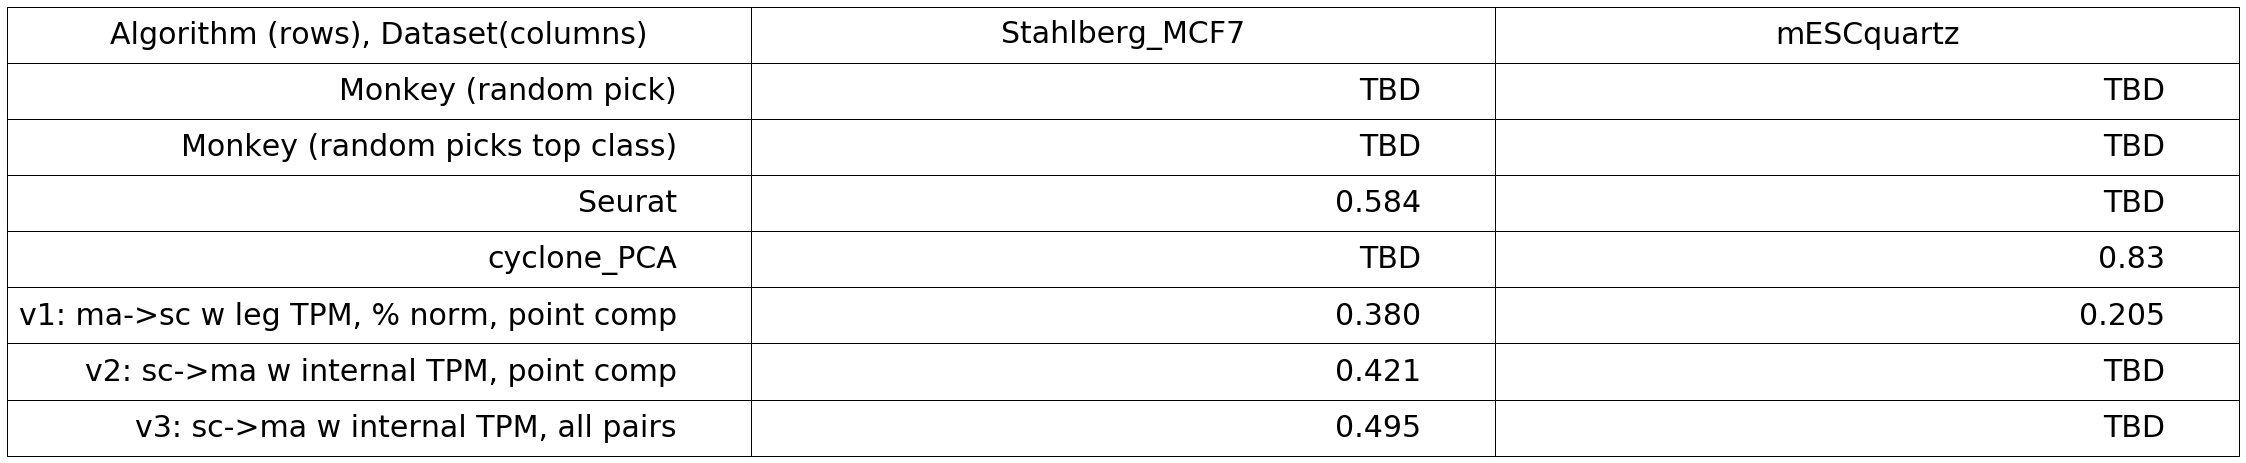

In [96]:
import matplotlib.pyplot as plt
from pylab import *
big_comparison_data = []
big_comparison_data.append(["Monkey (random pick)", "TBD", "TBD"])
big_comparison_data.append(["Monkey (random picks top class)", "TBD", "TBD"])
big_comparison_data.append(["Seurat", "0.584", "TBD"]) # from EndSeptember notebook
big_comparison_data.append(["cyclone_PCA", "TBD", "0.83"]) # from paper, get code
# micro-array as sc with GTEX Leg TPM percent normalization single comparison
big_comparison_data.append(["v1: ma->sc w leg TPM, % norm, point comp", "0.380", "0.205"]) # from October notebook 
big_comparison_data.append(["v2: sc->ma w internal TPM, point comp", "0.421", "TBD"]) # from October notebook
big_comparison_data.append(["v3: sc->ma w internal TPM, all pairs", "0.495", "TBD"])

plt.figure(1, figsize=(20, 2))
plt.subplots_adjust(bottom = 0.1)
column_labels = ["Algorithm (rows), Dataset(columns)", "Stahlberg_MCF7", "mESCquartz"]
ax = subplot(111, frame_on=False) 
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 
the_table = ax.table(cellText=big_comparison_data, colLabels=column_labels, loc="center")
the_table.auto_set_font_size(False)
the_table.set_fontsize(30)
the_table.scale(2, 2)
table_props = the_table.properties()
table_cells = table_props['child_artists']
for cell in table_cells: cell.set_height(0.5)
plt.show()